## Importing Library

In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from random import randrange
import scipy as sp
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import tree
import graphviz
import pickle
import warnings

## Load Data

In [241]:
# Membaca data pada excel
data = pd.read_csv('data_sintetis2.csv')
data

,NIP,Nama,Jabatan,Objective 1,Key Result 1,Objective 2,Key Result 2,Target Q1,Target Q2,Unit,Complexity,Progress Q1,Progress Q2,Assignor Rating Q1,Assignor Rating Q2,Nilai Quartal 1,Nilai Quartal 2,Predikat,Tanggal,Kategori Predikat
0,466-60-3518,Bradley Galvan,Staff Operasi,Mendorong efisiensi cost bidang operasi,Tersedianya laporan pola operasi tersier setia...,Mendorong efisiensi cost bidang operasi,Tercapainya optimalisasi pola operasi tersier ...,60,88,percent,1,59,82,3,2,95.000000,87.909091,91.454545,2024-08-08,Memuaskan
1,167-52-0691,Sharon Harris,Staff Operasi,Mendorong efisiensi cost bidang operasi,Tercapainya kinerja SWP Pos Same Day Wilker (K...,Mendorong efisiensi cost bidang operasi,Tercapainya kinerja SWP Pos Reguler Wilker (KC...,78,64,percent,1,71,62,5,5,98.615385,102.125000,100.370192,2024-08-08,Sangat Memuaskan
2,377-11-9746,David Cook,Staff Operasi,Meningkatkan efektifitas sumber daya penunjang...,Tercapainya optimalisasi kbm tersier setiap bulan,Mendorong efisiensi cost bidang operasi,Tersedianya monitoring kebutuhan dan penataan ...,1,2,laporan,4,1,1,2,4,92.000000,70.000000,81.000000,2024-08-08,Baik
3,818-12-3550,Aaron Smith,Staff Operasi,Meningkatkan efektifitas sumber daya penunjang...,Tersedianya laporan evaluasi implementasi oran...,Mendorong efisiensi cost bidang operasi,Tercapainya optimalisasi kbm tersier setiap bulan,5,6,kegiatan,1,4,6,5,1,92.000000,88.000000,90.000000,2024-08-08,Memuaskan
4,342-94-2910,Leslie Mckinney,Staff Operasi,Meningkatkan efektifitas sumber daya penunjang...,Tercapainya optimalisasi kbm tersier setiap bulan,Mendorong efisiensi cost bidang operasi,Tersedianya laporan evaluasi implementasi oran...,15,15,kegiatan,5,7,14,3,1,64.000000,84.000000,74.000000,2024-08-08,Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,232-54-4400,Heather Roberts,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tercapainya penurunan jumlah kiriman gagal xra...,Mendorong efisiensi cost bidang operasi,Tercapainya keberangkatan moda angkutan sesuai...,14,5,kegiatan,3,13,1,1,1,83.714286,40.000000,61.857143,2024-08-08,Cukup
96,692-51-4169,Jon Dawson,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tercapainya keberangkatan moda angkutan sesuai...,Meningkatkan efektifitas sumber daya penunjang...,Tersedianya laporan evaluasi kiriman iregulari...,10,9,laporan,1,10,6,2,1,92.000000,68.000000,80.000000,2024-08-08,Baik
97,206-64-5705,Teresa Lynch,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tersedianya laporan evaluasi kiriman iregulari...,Mendorong efisiensi cost bidang operasi,Tersedianya laporan keberangkatan moda angkuta...,15,15,kegiatan,2,2,14,4,1,48.000000,84.000000,66.000000,2024-08-08,Cukup
98,574-87-7256,Adriana Hart,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tersedianya laporan evaluasi kiriman iregulari...,Mendorong efisiensi cost bidang operasi,Tercapainya penurunan jumlah kiriman gagal xra...,11,7,kegiatan,2,11,6,5,4,104.000000,91.428571,97.714286,2024-08-08,Memuaskan


## Data Preprocessing

In [244]:
# Mengganti spasi dengan underscore pada nama kolom
data.columns = data.columns.str.replace(' ', '_')

# Menampilkan DataFrame dengan kolom yang sudah diubah
print(data)

            NIP             Nama        Jabatan  \
0   466-60-3518   Bradley Galvan  Staff Operasi   
1   167-52-0691    Sharon Harris  Staff Operasi   
2   377-11-9746       David Cook  Staff Operasi   
3   818-12-3550      Aaron Smith  Staff Operasi   
4   342-94-2910  Leslie Mckinney  Staff Operasi   
..          ...              ...            ...   
95  232-54-4400  Heather Roberts  Staff Operasi   
96  692-51-4169       Jon Dawson  Staff Operasi   
97  206-64-5705     Teresa Lynch  Staff Operasi   
98  574-87-7256     Adriana Hart  Staff Operasi   
99  299-02-8126   Daniel Johnson  Staff Operasi   

                                          Objective_1  \
0             Mendorong efisiensi cost bidang operasi   
1             Mendorong efisiensi cost bidang operasi   
2   Meningkatkan efektifitas sumber daya penunjang...   
3   Meningkatkan efektifitas sumber daya penunjang...   
4   Meningkatkan efektifitas sumber daya penunjang...   
..                                           

In [246]:
data = data.drop_duplicates()
data

,NIP,Nama,Jabatan,Objective_1,Key_Result_1,Objective_2,Key_Result_2,Target_Q1,Target_Q2,Unit,Complexity,Progress_Q1,Progress_Q2,Assignor_Rating_Q1,Assignor_Rating_Q2,Nilai_Quartal_1,Nilai_Quartal_2,Predikat,Tanggal,Kategori_Predikat
0,466-60-3518,Bradley Galvan,Staff Operasi,Mendorong efisiensi cost bidang operasi,Tersedianya laporan pola operasi tersier setia...,Mendorong efisiensi cost bidang operasi,Tercapainya optimalisasi pola operasi tersier ...,60,88,percent,1,59,82,3,2,95.000000,87.909091,91.454545,2024-08-08,Memuaskan
1,167-52-0691,Sharon Harris,Staff Operasi,Mendorong efisiensi cost bidang operasi,Tercapainya kinerja SWP Pos Same Day Wilker (K...,Mendorong efisiensi cost bidang operasi,Tercapainya kinerja SWP Pos Reguler Wilker (KC...,78,64,percent,1,71,62,5,5,98.615385,102.125000,100.370192,2024-08-08,Sangat Memuaskan
2,377-11-9746,David Cook,Staff Operasi,Meningkatkan efektifitas sumber daya penunjang...,Tercapainya optimalisasi kbm tersier setiap bulan,Mendorong efisiensi cost bidang operasi,Tersedianya monitoring kebutuhan dan penataan ...,1,2,laporan,4,1,1,2,4,92.000000,70.000000,81.000000,2024-08-08,Baik
3,818-12-3550,Aaron Smith,Staff Operasi,Meningkatkan efektifitas sumber daya penunjang...,Tersedianya laporan evaluasi implementasi oran...,Mendorong efisiensi cost bidang operasi,Tercapainya optimalisasi kbm tersier setiap bulan,5,6,kegiatan,1,4,6,5,1,92.000000,88.000000,90.000000,2024-08-08,Memuaskan
4,342-94-2910,Leslie Mckinney,Staff Operasi,Meningkatkan efektifitas sumber daya penunjang...,Tercapainya optimalisasi kbm tersier setiap bulan,Mendorong efisiensi cost bidang operasi,Tersedianya laporan evaluasi implementasi oran...,15,15,kegiatan,5,7,14,3,1,64.000000,84.000000,74.000000,2024-08-08,Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,232-54-4400,Heather Roberts,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tercapainya penurunan jumlah kiriman gagal xra...,Mendorong efisiensi cost bidang operasi,Tercapainya keberangkatan moda angkutan sesuai...,14,5,kegiatan,3,13,1,1,1,83.714286,40.000000,61.857143,2024-08-08,Cukup
96,692-51-4169,Jon Dawson,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tercapainya keberangkatan moda angkutan sesuai...,Meningkatkan efektifitas sumber daya penunjang...,Tersedianya laporan evaluasi kiriman iregulari...,10,9,laporan,1,10,6,2,1,92.000000,68.000000,80.000000,2024-08-08,Baik
97,206-64-5705,Teresa Lynch,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tersedianya laporan evaluasi kiriman iregulari...,Mendorong efisiensi cost bidang operasi,Tersedianya laporan keberangkatan moda angkuta...,15,15,kegiatan,2,2,14,4,1,48.000000,84.000000,66.000000,2024-08-08,Cukup
98,574-87-7256,Adriana Hart,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tersedianya laporan evaluasi kiriman iregulari...,Mendorong efisiensi cost bidang operasi,Tercapainya penurunan jumlah kiriman gagal xra...,11,7,kegiatan,2,11,6,5,4,104.000000,91.428571,97.714286,2024-08-08,Memuaskan


In [248]:
data = data.dropna()
data

,NIP,Nama,Jabatan,Objective_1,Key_Result_1,Objective_2,Key_Result_2,Target_Q1,Target_Q2,Unit,Complexity,Progress_Q1,Progress_Q2,Assignor_Rating_Q1,Assignor_Rating_Q2,Nilai_Quartal_1,Nilai_Quartal_2,Predikat,Tanggal,Kategori_Predikat
0,466-60-3518,Bradley Galvan,Staff Operasi,Mendorong efisiensi cost bidang operasi,Tersedianya laporan pola operasi tersier setia...,Mendorong efisiensi cost bidang operasi,Tercapainya optimalisasi pola operasi tersier ...,60,88,percent,1,59,82,3,2,95.000000,87.909091,91.454545,2024-08-08,Memuaskan
1,167-52-0691,Sharon Harris,Staff Operasi,Mendorong efisiensi cost bidang operasi,Tercapainya kinerja SWP Pos Same Day Wilker (K...,Mendorong efisiensi cost bidang operasi,Tercapainya kinerja SWP Pos Reguler Wilker (KC...,78,64,percent,1,71,62,5,5,98.615385,102.125000,100.370192,2024-08-08,Sangat Memuaskan
2,377-11-9746,David Cook,Staff Operasi,Meningkatkan efektifitas sumber daya penunjang...,Tercapainya optimalisasi kbm tersier setiap bulan,Mendorong efisiensi cost bidang operasi,Tersedianya monitoring kebutuhan dan penataan ...,1,2,laporan,4,1,1,2,4,92.000000,70.000000,81.000000,2024-08-08,Baik
3,818-12-3550,Aaron Smith,Staff Operasi,Meningkatkan efektifitas sumber daya penunjang...,Tersedianya laporan evaluasi implementasi oran...,Mendorong efisiensi cost bidang operasi,Tercapainya optimalisasi kbm tersier setiap bulan,5,6,kegiatan,1,4,6,5,1,92.000000,88.000000,90.000000,2024-08-08,Memuaskan
4,342-94-2910,Leslie Mckinney,Staff Operasi,Meningkatkan efektifitas sumber daya penunjang...,Tercapainya optimalisasi kbm tersier setiap bulan,Mendorong efisiensi cost bidang operasi,Tersedianya laporan evaluasi implementasi oran...,15,15,kegiatan,5,7,14,3,1,64.000000,84.000000,74.000000,2024-08-08,Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,232-54-4400,Heather Roberts,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tercapainya penurunan jumlah kiriman gagal xra...,Mendorong efisiensi cost bidang operasi,Tercapainya keberangkatan moda angkutan sesuai...,14,5,kegiatan,3,13,1,1,1,83.714286,40.000000,61.857143,2024-08-08,Cukup
96,692-51-4169,Jon Dawson,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tercapainya keberangkatan moda angkutan sesuai...,Meningkatkan efektifitas sumber daya penunjang...,Tersedianya laporan evaluasi kiriman iregulari...,10,9,laporan,1,10,6,2,1,92.000000,68.000000,80.000000,2024-08-08,Baik
97,206-64-5705,Teresa Lynch,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tersedianya laporan evaluasi kiriman iregulari...,Mendorong efisiensi cost bidang operasi,Tersedianya laporan keberangkatan moda angkuta...,15,15,kegiatan,2,2,14,4,1,48.000000,84.000000,66.000000,2024-08-08,Cukup
98,574-87-7256,Adriana Hart,Staff Operasi,Menurunkan tingkat iregularitas sesuai target ...,Tersedianya laporan evaluasi kiriman iregulari...,Mendorong efisiensi cost bidang operasi,Tercapainya penurunan jumlah kiriman gagal xra...,11,7,kegiatan,2,11,6,5,4,104.000000,91.428571,97.714286,2024-08-08,Memuaskan


In [250]:
# Mengecek data missing value
data.isnull().sum()

NIP                   0
Nama                  0
Jabatan               0
Objective_1           0
Key_Result_1          0
Objective_2           0
Key_Result_2          0
Target_Q1             0
Target_Q2             0
Unit                  0
Complexity            0
Progress_Q1           0
Progress_Q2           0
Assignor_Rating_Q1    0
Assignor_Rating_Q2    0
Nilai_Quartal_1       0
Nilai_Quartal_2       0
Predikat              0
Tanggal               0
Kategori_Predikat     0
dtype: int64

In [252]:
# Title info type data
print('Tipe Data Sebelum:\n')
data.info()

Tipe Data Sebelum:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NIP                 100 non-null    object 
 1   Nama                100 non-null    object 
 2   Jabatan             100 non-null    object 
 3   Objective_1         100 non-null    object 
 4   Key_Result_1        100 non-null    object 
 5   Objective_2         100 non-null    object 
 6   Key_Result_2        100 non-null    object 
 7   Target_Q1           100 non-null    int64  
 8   Target_Q2           100 non-null    int64  
 9   Unit                100 non-null    object 
 10  Complexity          100 non-null    int64  
 11  Progress_Q1         100 non-null    int64  
 12  Progress_Q2         100 non-null    int64  
 13  Assignor_Rating_Q1  100 non-null    int64  
 14  Assignor_Rating_Q2  100 non-null    int64  
 15  Nilai_Quartal_1     100 non-null    fl

In [254]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['NIP', 'Nama', 'Jabatan', 'Objective_1', 'Key_Result_1', 'Objective_2',
       'Key_Result_2', 'Unit', 'Tanggal', 'Kategori_Predikat'],
      dtype='object')
Numerical Variables:
['Target_Q1', 'Target_Q2', 'Complexity', 'Progress_Q1', 'Progress_Q2', 'Assignor_Rating_Q1', 'Assignor_Rating_Q2', 'Nilai_Quartal_1', 'Nilai_Quartal_2', 'Predikat']


## Exploratory Data Analysis (EDA)

In [257]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NIP                 100 non-null    object 
 1   Nama                100 non-null    object 
 2   Jabatan             100 non-null    object 
 3   Objective_1         100 non-null    object 
 4   Key_Result_1        100 non-null    object 
 5   Objective_2         100 non-null    object 
 6   Key_Result_2        100 non-null    object 
 7   Target_Q1           100 non-null    int64  
 8   Target_Q2           100 non-null    int64  
 9   Unit                100 non-null    object 
 10  Complexity          100 non-null    int64  
 11  Progress_Q1         100 non-null    int64  
 12  Progress_Q2         100 non-null    int64  
 13  Assignor_Rating_Q1  100 non-null    int64  
 14  Assignor_Rating_Q2  100 non-null    int64  
 15  Nilai_Quartal_1     100 non-null    float64
 16  Nilai_Qua

Target_Q1
Skew : 1.07


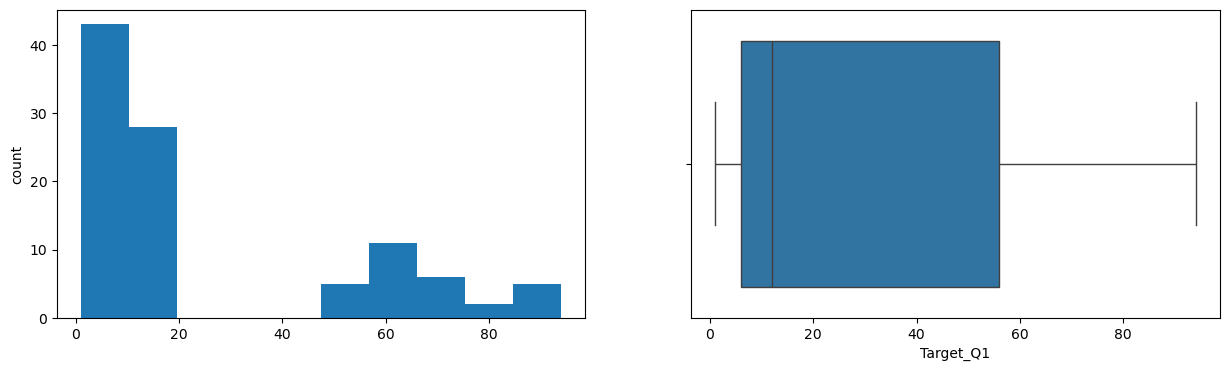

Target_Q2
Skew : 1.16


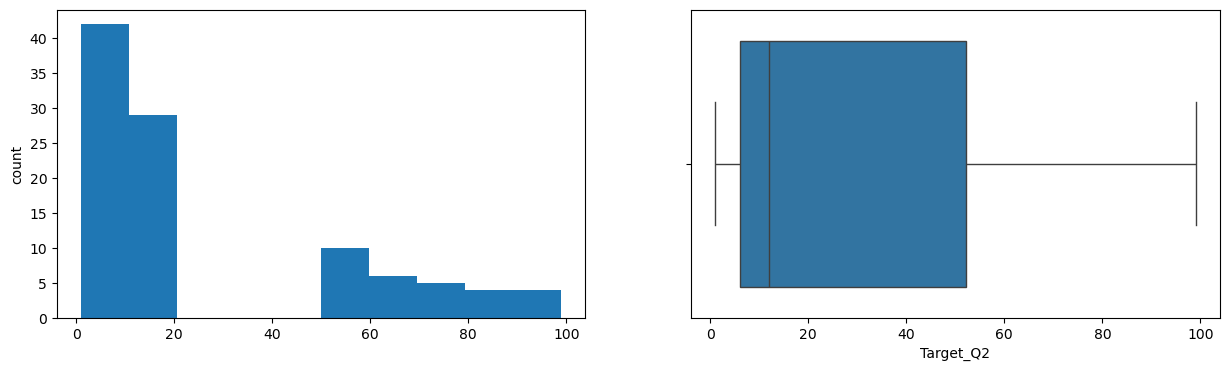

Complexity
Skew : 0.19


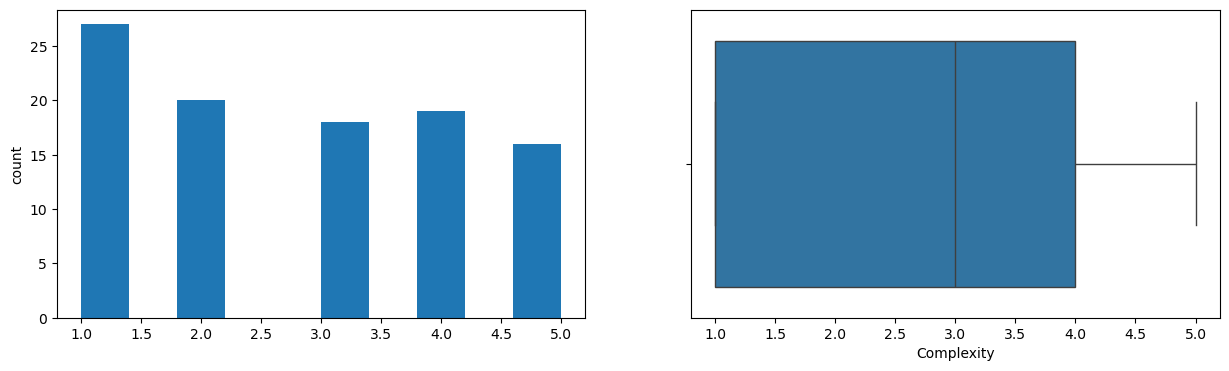

Progress_Q1
Skew : 1.02


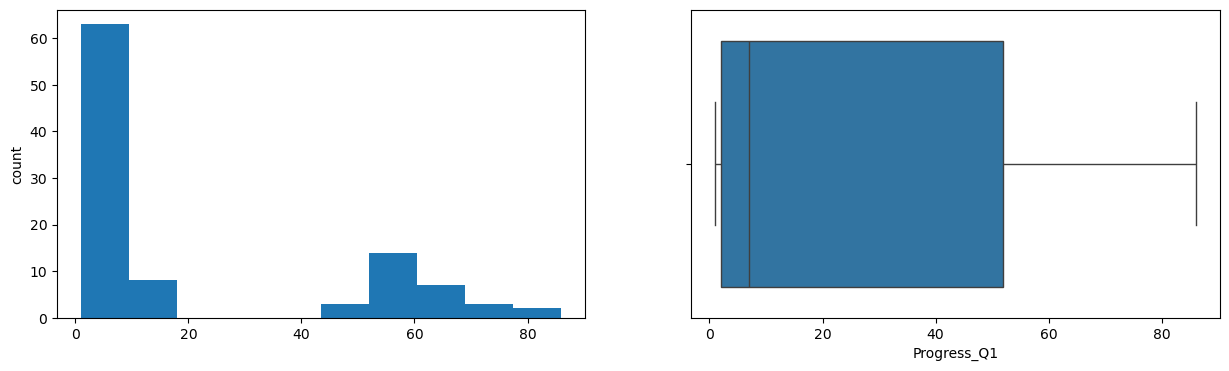

Progress_Q2
Skew : 1.12


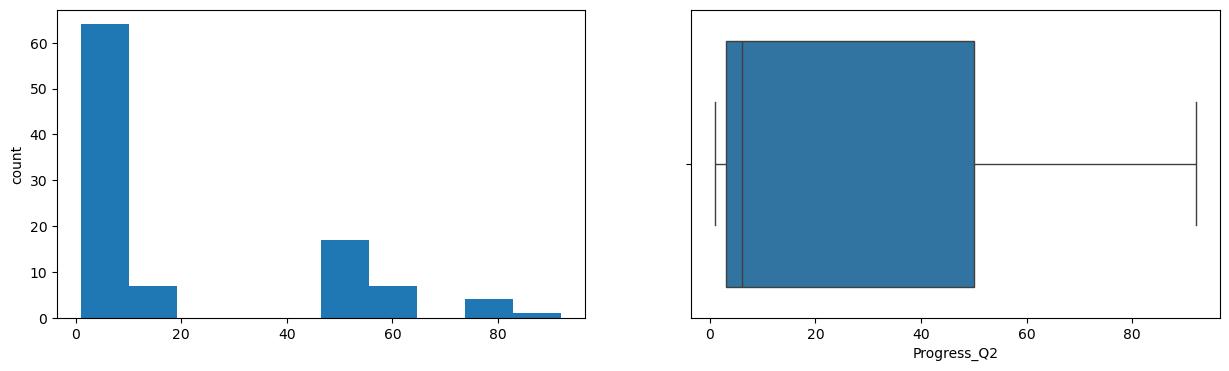

Assignor_Rating_Q1
Skew : -0.02


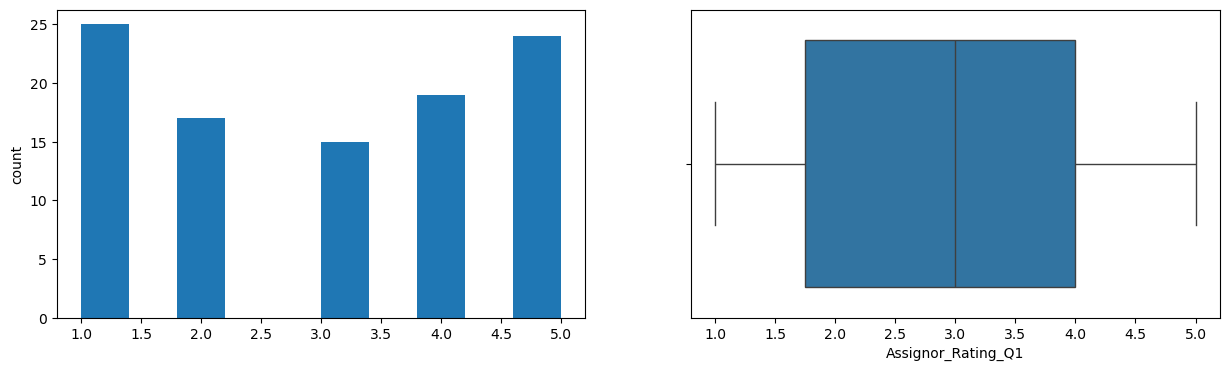

Assignor_Rating_Q2
Skew : -0.12


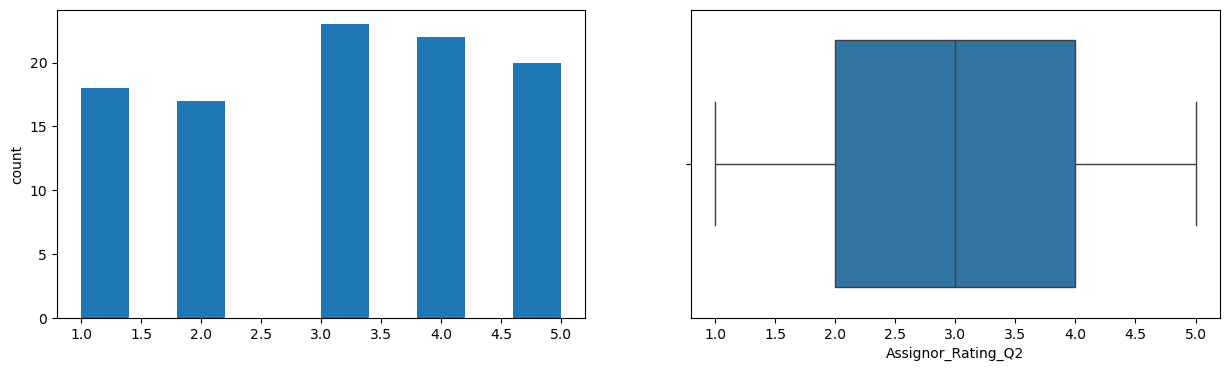

Nilai_Quartal_1
Skew : -0.36


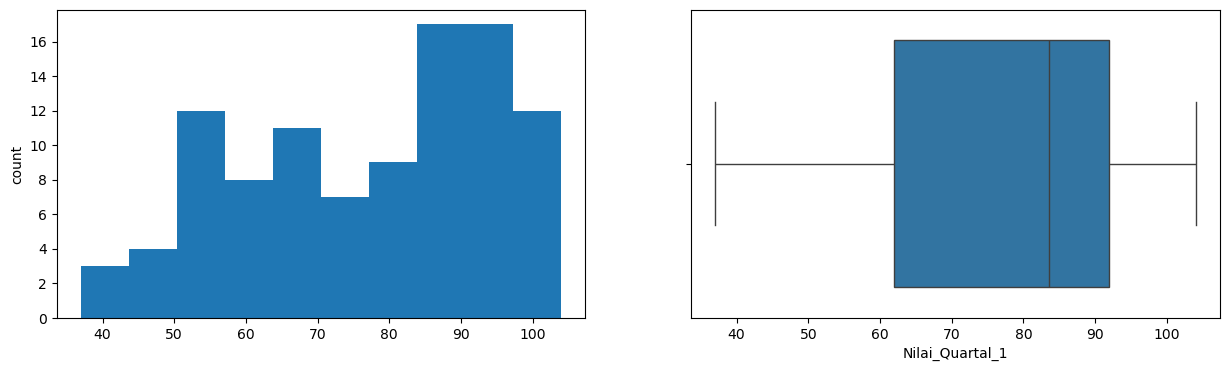

Nilai_Quartal_2
Skew : -0.4


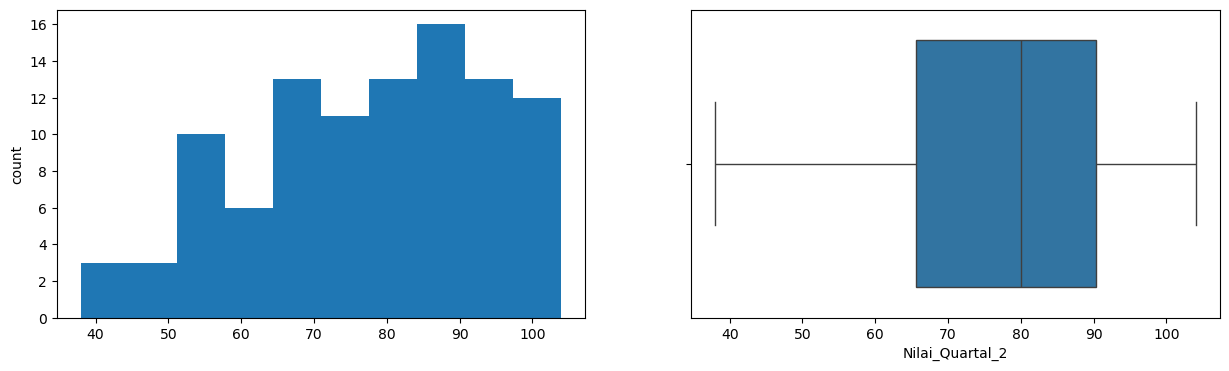

Predikat
Skew : -0.31


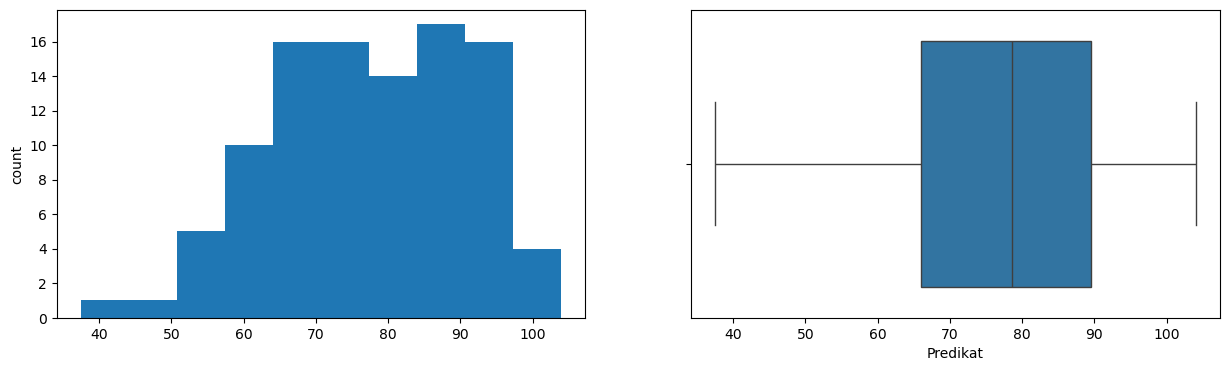

In [259]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

## Feature Engineering

In [262]:
X = data.drop(['Kategori_Predikat', 'Predikat', 'NIP', 'Nama', 'Jabatan', 'Unit', 'Tanggal'], axis=1)
y = data['Kategori_Predikat']

In [264]:
X = data[['Objective_1', 'Key_Result_1', 'Objective_2', 'Key_Result_2', 'Target_Q1', 'Target_Q2', 'Complexity', 'Progress_Q1', 'Progress_Q2', 'Assignor_Rating_Q1', 'Assignor_Rating_Q2', 'Nilai_Quartal_1', 'Nilai_Quartal_2', 'Predikat', 'Kategori_Predikat']]
X

,Objective_1,Key_Result_1,Objective_2,Key_Result_2,Target_Q1,Target_Q2,Complexity,Progress_Q1,Progress_Q2,Assignor_Rating_Q1,Assignor_Rating_Q2,Nilai_Quartal_1,Nilai_Quartal_2,Predikat,Kategori_Predikat
0,Mendorong efisiensi cost bidang operasi,Tersedianya laporan pola operasi tersier setia...,Mendorong efisiensi cost bidang operasi,Tercapainya optimalisasi pola operasi tersier ...,60,88,1,59,82,3,2,95.000000,87.909091,91.454545,Memuaskan
1,Mendorong efisiensi cost bidang operasi,Tercapainya kinerja SWP Pos Same Day Wilker (K...,Mendorong efisiensi cost bidang operasi,Tercapainya kinerja SWP Pos Reguler Wilker (KC...,78,64,1,71,62,5,5,98.615385,102.125000,100.370192,Sangat Memuaskan
2,Meningkatkan efektifitas sumber daya penunjang...,Tercapainya optimalisasi kbm tersier setiap bulan,Mendorong efisiensi cost bidang operasi,Tersedianya monitoring kebutuhan dan penataan ...,1,2,4,1,1,2,4,92.000000,70.000000,81.000000,Baik
3,Meningkatkan efektifitas sumber daya penunjang...,Tersedianya laporan evaluasi implementasi oran...,Mendorong efisiensi cost bidang operasi,Tercapainya optimalisasi kbm tersier setiap bulan,5,6,1,4,6,5,1,92.000000,88.000000,90.000000,Memuaskan
4,Meningkatkan efektifitas sumber daya penunjang...,Tercapainya optimalisasi kbm tersier setiap bulan,Mendorong efisiensi cost bidang operasi,Tersedianya laporan evaluasi implementasi oran...,15,15,5,7,14,3,1,64.000000,84.000000,74.000000,Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Menurunkan tingkat iregularitas sesuai target ...,Tercapainya penurunan jumlah kiriman gagal xra...,Mendorong efisiensi cost bidang operasi,Tercapainya keberangkatan moda angkutan sesuai...,14,5,3,13,1,1,1,83.714286,40.000000,61.857143,Cukup
96,Menurunkan tingkat iregularitas sesuai target ...,Tercapainya keberangkatan moda angkutan sesuai...,Meningkatkan efektifitas sumber daya penunjang...,Tersedianya laporan evaluasi kiriman iregulari...,10,9,1,10,6,2,1,92.000000,68.000000,80.000000,Baik
97,Menurunkan tingkat iregularitas sesuai target ...,Tersedianya laporan evaluasi kiriman iregulari...,Mendorong efisiensi cost bidang operasi,Tersedianya laporan keberangkatan moda angkuta...,15,15,2,2,14,4,1,48.000000,84.000000,66.000000,Cukup
98,Menurunkan tingkat iregularitas sesuai target ...,Tersedianya laporan evaluasi kiriman iregulari...,Mendorong efisiensi cost bidang operasi,Tercapainya penurunan jumlah kiriman gagal xra...,11,7,2,11,6,5,4,104.000000,91.428571,97.714286,Memuaskan


## Normaslisasi

In [267]:
from sklearn.preprocessing import StandardScaler

def normalize_data(data, columns_to_normalize):
    scaler = StandardScaler()
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
    return data

# Kolom-kolom numerik yang akan dinormalisasi
columns_numeric = ['Target_Q1', 'Target_Q2', 'Complexity', 'Progress_Q1', 'Progress_Q2', 'Assignor_Rating_Q1', 'Assignor_Rating_Q2', 'Nilai_Quartal_1', 'Nilai_Quartal_2', 'Predikat']

# Memanggil fungsi normalize_data hanya untuk kolom numerik
data_normalized = normalize_data(data, columns_numeric)

# Menampilkan DataFrame yang sudah dinormalisasi
print("Mean values after normalization:")
print(data_normalized[columns_numeric].mean())

print("\nStandard deviation values after normalization:")
print(data_normalized[columns_numeric].std())


Mean values after normalization:
Target_Q1             7.216450e-18
Target_Q2            -2.609024e-17
Complexity            2.442491e-17
Progress_Q1          -2.886580e-17
Progress_Q2           1.332268e-17
Assignor_Rating_Q1   -4.440892e-18
Assignor_Rating_Q2    4.551914e-17
Nilai_Quartal_1      -6.994405e-16
Nilai_Quartal_2      -6.972201e-16
Predikat              1.241229e-15
dtype: float64

Standard deviation values after normalization:
Target_Q1             1.005038
Target_Q2             1.005038
Complexity            1.005038
Progress_Q1           1.005038
Progress_Q2           1.005038
Assignor_Rating_Q1    1.005038
Assignor_Rating_Q2    1.005038
Nilai_Quartal_1       1.005038
Nilai_Quartal_2       1.005038
Predikat              1.005038
dtype: float64


## Encoded Data

In [270]:
# Misalkan X adalah DataFrame awal
# ... (kode untuk mendefinisikan DataFrame X)

# Copy DataFrame agar tidak merubah DataFrame asli
data_encoded = X.copy()

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Lakukan label encoding pada kolom
data_encoded['Objective_1'] = label_encoder.fit_transform(X['Objective_1'])
data_encoded['Key_Result_1'] = label_encoder.fit_transform(X['Key_Result_1'])

# Lakukan label encoding pada kolom
data_encoded['Objective_2'] = label_encoder.fit_transform(X['Objective_2'])
data_encoded['Key_Result_2'] = label_encoder.fit_transform(X['Key_Result_2'])

# Tampilkan DataFrame hasil
print(data_encoded)

    Objective_1  Key_Result_1  Objective_2  Key_Result_2  Target_Q1  \
0             0            13            0             7         60   
1             0             5            0             4         78   
2             1             6            0            14          1   
3             1            10            0             6          5   
4             1             6            0            10         15   
..          ...           ...          ...           ...        ...   
95            2             9            0             2         14   
96            2             2            1            11         10   
97            2            11            0            12         15   
98            2            11            0             9         11   
99            1            14            0            10         15   

    Target_Q2  Complexity  Progress_Q1  Progress_Q2  Assignor_Rating_Q1  \
0          88           1           59           82                   3 

## Split Data

In [434]:
# Pilih fitur dan target
features = ['Objective_1', 'Key_Result_1', 'Key_Result_2', 'Objective_2', 'Target_Q1', 'Target_Q2', 'Complexity', 'Progress_Q1', 'Progress_Q2', 'Assignor_Rating_Q1', 'Assignor_Rating_Q2', 'Nilai_Quartal_1', 'Nilai_Quartal_2', 'Predikat']
X_features = data_encoded[features]
y = data_encoded['Kategori_Predikat']

# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Tampilkan ukuran dari train dan test set
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 80
Test set size: 20


## Model Training

In [437]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

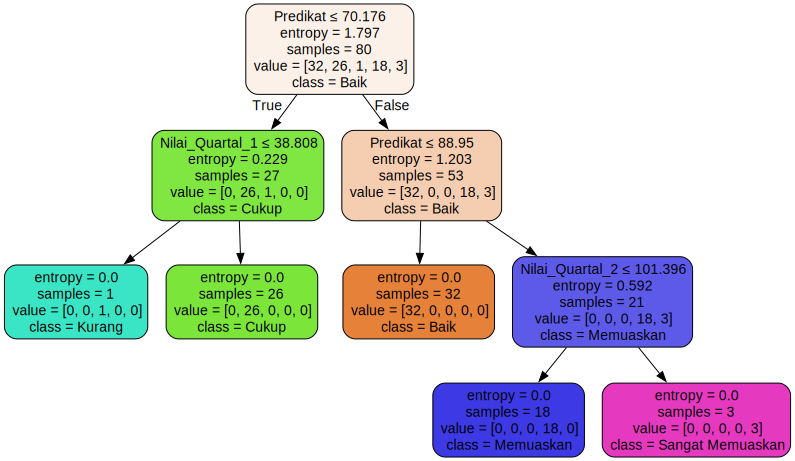

In [439]:
# Verifikasi path Graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# Visualisasikan pohon keputusan
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X_test.columns,  
                           class_names=clf.classes_,  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("pohonkeputusan")  # Menyimpan hasil ke file
graph

## Model Evaluation

In [442]:
# Menghitung metrik evaluasi
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 0.95
F1 Score: 0.973076923076923


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [444]:
test_accuracy = clf.score(X_test, y_test)

print(f"Accuracy on test set: {test_accuracy:.2f}")

Accuracy on test set: 0.95


In [446]:
# Menampilkan classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                   precision    recall  f1-score   support

            Baik       1.00      1.00      1.00         7
           Cukup       1.00      1.00      1.00         6
       Memuaskan       1.00      0.86      0.92         7
Sangat Memuaskan       0.00      0.00      0.00         0

        accuracy                           0.95        20
       macro avg       0.75      0.71      0.73        20
    weighted avg       1.00      0.95      0.97        20



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


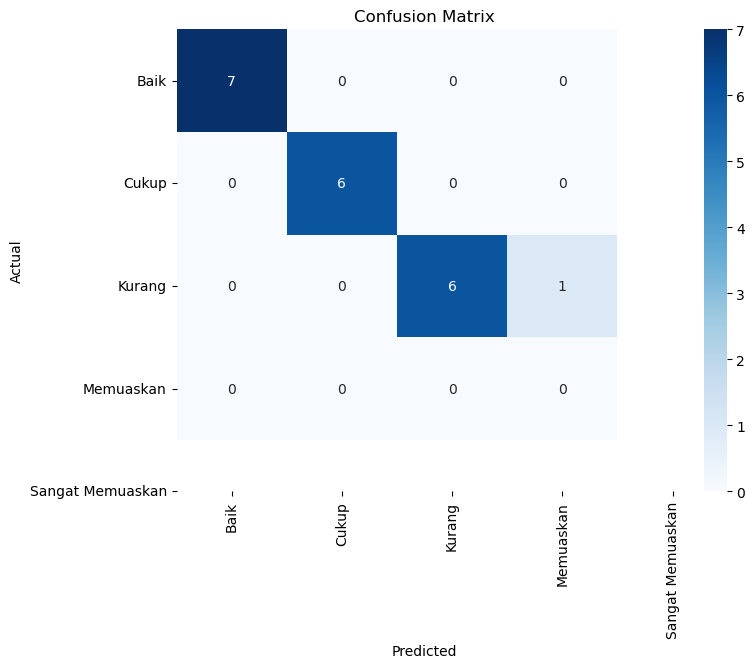

In [448]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [450]:
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

print("\nJumlah kategori di train set:")
for category, count in train_counts.items():
    print(f"{category}: {count}")

print("\nJumlah kategori di test set:")
for category, count in test_counts.items():
    print(f"{category}: {count}")


Jumlah kategori di train set:
Baik: 32
Cukup: 26
Memuaskan: 18
Sangat Memuaskan: 3
Kurang: 1

Jumlah kategori di test set:
Baik: 7
Memuaskan: 7
Cukup: 6


In [452]:
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(clf, file)
print("Model saved to 'decision_tree_model1.pkl'")

Model saved to 'decision_tree_model1.pkl'
